In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [2]:
df = pd.read_csv('loan_data.csv')

In [3]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


D:\Python\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Python\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


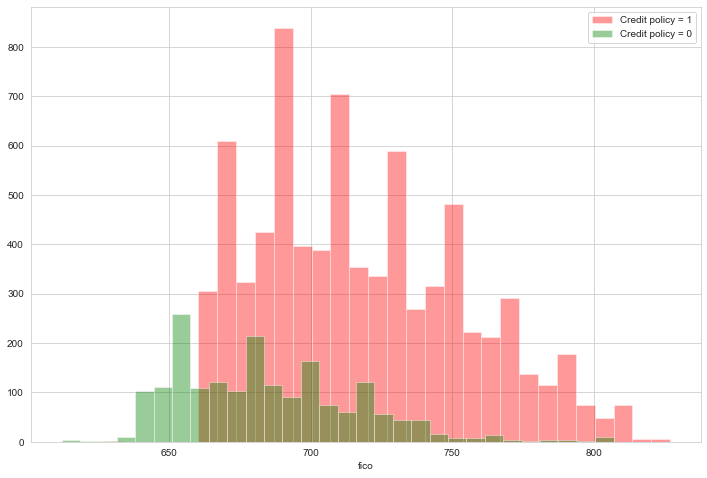

In [5]:
plt.figure(figsize=(12,8))
sns.set_style('whitegrid')
sns.distplot(df[df['credit.policy']==1]['fico'],bins=30,kde=False,color='red',label='Credit policy = 1')
sns.distplot(df[df['credit.policy']==0]['fico'],bins=30,kde=False,color='green',label='Credit policy = 0')
plt.legend()

D:\Python\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Python\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


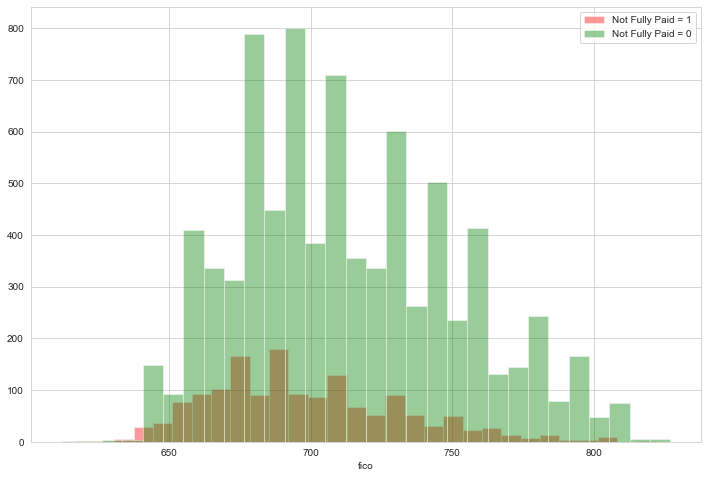

In [6]:
plt.figure(figsize=(12,8))
sns.set_style('whitegrid')
sns.distplot(df[df['not.fully.paid']==1]['fico'],bins=30,kde=False,color='red',label='Not Fully Paid = 1')
sns.distplot(df[df['not.fully.paid']==0]['fico'],bins=30,kde=False,color='green',label='Not Fully Paid = 0')
plt.legend()

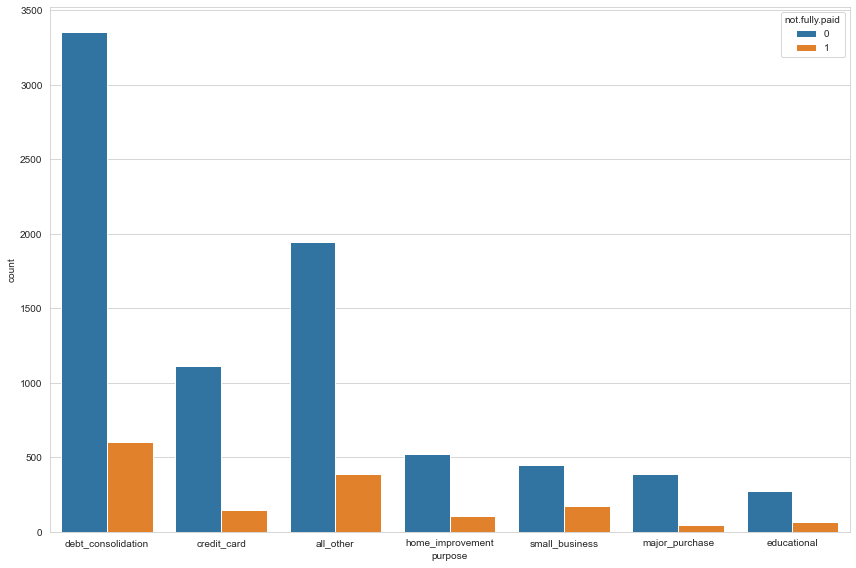

In [7]:
plt.figure(figsize=(12,8))
sns.set_style('whitegrid')
sns.countplot(x='purpose',data=df, hue='not.fully.paid')
plt.tight_layout()

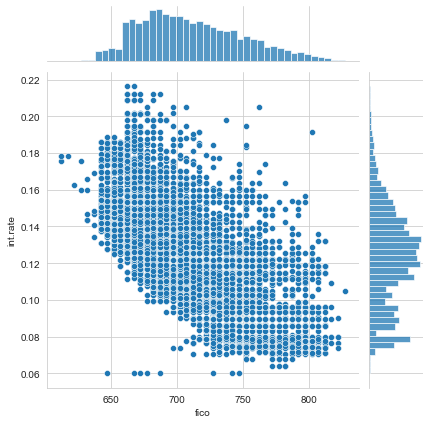

In [8]:
sns.jointplot(x='fico',y='int.rate',data=df)

<Figure size 864x576 with 0 Axes>

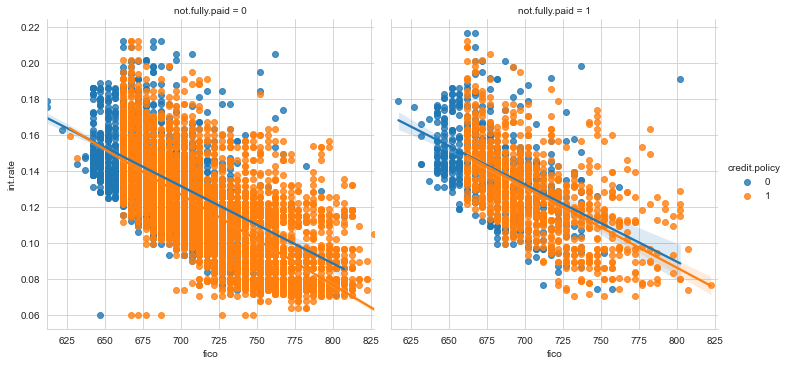

In [9]:
plt.figure(figsize=(12,8))
sns.set_style('whitegrid')
sns.lmplot(x='fico',y='int.rate',data=df,hue='credit.policy',col='not.fully.paid')

In [10]:
df['purpose'].value_counts()

debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: purpose, dtype: int64

In [11]:
dummy = pd.get_dummies(df['purpose'],drop_first=True)

In [12]:
final_data = pd.concat([df,dummy],axis=1).drop('purpose',axis=1)

In [13]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   credit.policy       9578 non-null   int64  
 1   int.rate            9578 non-null   float64
 2   installment         9578 non-null   float64
 3   log.annual.inc      9578 non-null   float64
 4   dti                 9578 non-null   float64
 5   fico                9578 non-null   int64  
 6   days.with.cr.line   9578 non-null   float64
 7   revol.bal           9578 non-null   int64  
 8   revol.util          9578 non-null   float64
 9   inq.last.6mths      9578 non-null   int64  
 10  delinq.2yrs         9578 non-null   int64  
 11  pub.rec             9578 non-null   int64  
 12  not.fully.paid      9578 non-null   int64  
 13  credit_card         9578 non-null   uint8  
 14  debt_consolidation  9578 non-null   uint8  
 15  educational         9578 non-null   uint8  
 16  home_i

In [14]:
X_train,X_test,y_train,y_test = train_test_split(final_data.drop('not.fully.paid',axis=1),final_data['not.fully.paid'], test_size = 0.3, random_state = 42)

In [50]:
dtree = DecisionTreeClassifier()

In [51]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [53]:
dtree_predict = dtree.predict(X_test)

In [54]:
print(confusion_matrix(y_test,dtree_predict))
print(classification_report(y_test,dtree_predict))

[[2008  400]
 [ 368   98]]
              precision    recall  f1-score   support

           0       0.85      0.83      0.84      2408
           1       0.20      0.21      0.20       466

    accuracy                           0.73      2874
   macro avg       0.52      0.52      0.52      2874
weighted avg       0.74      0.73      0.74      2874



In [55]:
random_forest = RandomForestClassifier(n_estimators=600)

In [56]:
random_forest.fit(X_train,y_train)

RandomForestClassifier(n_estimators=600)

In [57]:
random_forest_predict = random_forest.predict(X_test)

In [58]:
print(confusion_matrix(y_test,random_forest_predict))
print(classification_report(y_test,random_forest_predict))

[[2394   14]
 [ 457    9]]
              precision    recall  f1-score   support

           0       0.84      0.99      0.91      2408
           1       0.39      0.02      0.04       466

    accuracy                           0.84      2874
   macro avg       0.62      0.51      0.47      2874
weighted avg       0.77      0.84      0.77      2874



In [59]:
tn, fp, fn, tp = confusion_matrix(y_test, random_forest_predict).ravel()

In [60]:
tn

2394

In [61]:
fp

14

In [62]:
fn

457